# 다항 분포

베르누이 시도를 여러번 하여 얻은 총 성공 횟수 합이 이항 분포를 이루는 것처럼 **독립적인 카테고리 분포를 여러번 시도하여 얻은 각 원소의 성공횟수 값은 다항 분포(Multinomial distribution)을 이룬다.**

다항 분포는 확률 모수가 $\theta = (\theta_1, \cdots, \theta_K)$인 독립적인 카테고리 시도를 $N$번 반복해서 $k$가 각각 $x_k$번 나올 확률 즉, 벡터 $x = (x_1, \cdots, x_K)$가 나올 확률 분포를 말한다. 

$$ \sum_{k=1}^K x_k = N $$

예를 들어 $x = (1, 2, 1, 2, 3, 1)$은 6개의 숫자가 나올 수 있는 주사위를 10번 던져서 1인 면이 1번, 2인 면이 2번, 3인 면이 1번, 4인 면이 2번, 5인 면이 3 번, 6인 면이 1번 나왔다는 뜻이다.

다항 분포의 확률 질량 함수는 $\text{Mu}(x;N,\theta) $와 같이 표기하며 다음과 같은 수식을 따른다.

$$ \text{Mu}(x;N,\theta) = \binom N x  \prod_{k=1}^K \theta_k^{x_k} = \binom N {x_1, \cdots, x_K} \prod_{k=1}^K \theta_k^{x_k} $$

이 식에서 
$$ \binom N {x_1, \cdots, x_K} = \dfrac{N!}{x_1! \cdots x_K!} $$

## 다항 분포의 모멘트

다항 분포의 기댓값과 분산은 다음과 같다.

* 기댓값
$$\text{E}[x_k] = N\theta_k$$

* 분산
$$\text{Var}[x_k] = N\theta_k(1-\theta_k)$$

## SciPy를 이용한 다항 분포의 시뮬레이션

SciPy는 다항 분포를 위한 `multinomial` 클래스를 지원한다. 인수로는 시행 횟수 $N$과 모수 벡터 $\theta$를 받는다.

In [2]:
N = 30
theta = [0, 0, 0.1, 0.2, 0.3, 0.4]
rv = sp.stats.multinomial(N, theta)

In [3]:
np.random.seed(0)
X = rv.rvs(100)
X[:5]

array([[ 0,  0,  3,  6,  9, 12],
       [ 0,  0,  5,  9,  6, 10],
       [ 0,  0,  3,  9,  5, 13],
       [ 0,  0,  5,  7, 10,  8],
       [ 0,  0,  3,  8,  6, 13]])

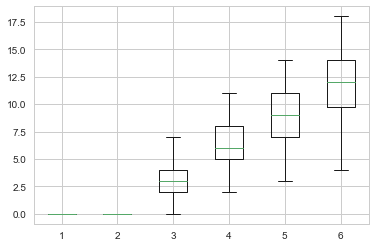

In [4]:
%matplotlib inline
plt.boxplot(X)
plt.show()

In [5]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ["trial", "class", "binomial"]

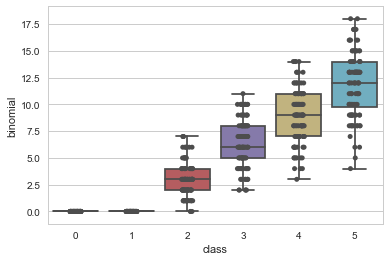

In [6]:
sns.boxplot(x="class", y="binomial", data=df)
sns.stripplot(x="class", y="binomial", data=df, jitter=True, color=".3")
plt.show()

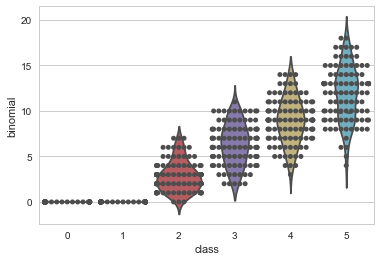

In [7]:
sns.violinplot(x="class", y="binomial", data=df, inner="quartile")
sns.swarmplot(x="class", y="binomial", data=df, color=".3")
plt.show()